In [ ]:
########################################################################
############# INSTALL PACKAGES #########################################
########################################################################

install.packages("INLA",repos=c(getOption("repos"),INLA="https://inla.r-inla-download.org/R/stable"), dep=TRUE)
install.packages("fmesher", dependencies = TRUE)
install.packages("MatrixModels", type = "source")
install.packages("exactextractr")
install.packages("sn" ,dependencies = TRUE)
packages <- c("terra","dplyr","spdep", "exactextractr", "sf","ggplot2","viridis","sn","fmesher","exactextractr","fields")
package.check <- lapply(packages, FUN = function(x) {
    if (!require(x, character.only = TRUE)) {
        install.packages(x, dependencies = TRUE)
        library(x, character.only = TRUE, quietly=TRUE)
    }
})
Sys.setenv("AWS_DEFAULT_REGION" = 'us-west-2')

In [1]:
library("fmesher")
library(MatrixModels)
library(Matrix)
library(INLA)
library(inlabru)
library("jpeg")
library(gstat)
library(MatrixModels)

library(sf)
library(terra)
library(dplyr)
library(spdep)
library(raster)
library(exactextractr)

library(ggplot2)
library(viridis)
library(stringr)

Warning message:
“package ‘INLA’ was built under R version 4.4.2”
This is INLA_24.12.11 built 2024-12-11 19:58:26 UTC.
 - See www.r-inla.org/contact-us for how to get help.
 - List available models/likelihoods/etc with inla.list.models()
 - Use inla.doc(<NAME>) to access documentation

Linking to GEOS 3.12.1, GDAL 3.8.5, PROJ 9.4.0; sf_use_s2() is TRUE

terra 1.7.78


Attaching package: ‘dplyr’


The following objects are masked from ‘package:terra’:

    intersect, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: spData

To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`

Loading required package: sp


Attaching package: ‘raster’


The following object is masked from ‘package:dplyr’:

    select


Loading required

In [6]:
############################################################################
######## GENERATE PSU-LEVEL NFI ESTIMATES FROM SSU-LEVEL DATA ##############
############################################################################

# Filling AGBD = 0 Mg/ha on SSU-level subunits in the Brazilian NFI. 

# nfi <- st_read("/projects/my-private-bucket/Data/NFI_data/Brazil/Brazil_NFI_dated.gpkg")
# all_subunits <- data.frame(
#   Subunidade = rep(1:4, each = length(unique(nfi$UA))),
#   UA = rep(unique(nfi$UA), times = 4)
# )

# nfi_full <- merge(all_subunits, nfi, by = c("UA", "Subunidade"), all.x = TRUE)

# missing_rows <- is.na(nfi_full$AGB_Mg.ha2)

# nfi_full[missing_rows, c("AGB_Mg.ha2", "AGB_Mg")] <- 0

# fill_missing_values <- function(x) {
#   ifelse(is.na(x), x[!is.na(x)][1], x)  # Take the first non-NA value in the vector
# }

# # # nfi_full$Biome <- ave(nfi_full$Biome, nfi_full$UA, FUN = fill_missing_values)
# # # nfi_full$Brazil <- ave(nfi_full$Brazil, nfi_full$UA, FUN = fill_missing_values)
# # # nfi_full$lon_pc <- ave(nfi_full$lon_pc, nfi_full$UA, FUN = fill_missing_values)
# # # nfi_full$lat_pc <- ave(nfi_full$lat_pc, nfi_full$UA, FUN = fill_missing_values)
# # # nfi_full$Date_of_measurement <- ave(nfi_full$Date_of_measurement, nfi_full$UA, FUN = fill_missing_values)

# nfi_full$Biome <- ave(as.vector(nfi_full$Biome), nfi_full$UA, FUN = fill_missing_values)
# nfi_full$Subunidade <- ave(as.vector(nfi_full$Subunidade), nfi_full$UA, FUN = fill_missing_values)
# nfi_full$State <- ave(as.vector(nfi_full$State), nfi_full$UA, FUN = fill_missing_values)
# nfi_full$lon_pc <- ave(as.vector(nfi_full$lon_pc), nfi_full$UA, FUN = fill_missing_values)
# nfi_full$lat_pc <- ave(as.vector(nfi_full$lat_pc), nfi_full$UA, FUN = fill_missing_values)
# nfi_full$Date_of_measurement <- ave(as.vector(nfi_full$Date_of_measurement), nfi_full$UA, FUN = fill_missing_values)

# nfi_full_sf <- st_as_sf(nfi_full, coords = c("lon_pc", "lat_pc"), crs = st_crs(nfi))
# st_write(nfi_full_sf, "/projects/my-private-bucket/Data/NFI_data/Brazil/Brazil_NFI_filled.gpkg")

Reading layer `Brazil_NFI_filled' from data source 
  `/projects/my-private-bucket/Data/NFI_data/Brazil/Brazil_NFI_filled.gpkg' 
  using driver `GPKG'
Simple feature collection with 19752 features and 7 fields (with 3496 geometries empty)
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -73.0802 ymin: -24.11986 xmax: -37.80046 ymax: 4.139996
Geodetic CRS:  WGS 84


Cannot preload entire working area of 1306438840 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 40949184 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
Writing layer `NFI_and_COVS' to data source 
  `/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/Provinces_with_data/NFI_and_COVS.gpkg' using driver `GPKG'
Writing 4938 features with 5 fields and geometry type Point.
Reading layer `NFI_and_COVS' from data source 
  `/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/Provinces_with_data/NFI_and_COVS.gpkg' 
  using driver `GPKG'
Simple feature collection with 4938 features and 5 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -7051237 ymin: -2989196 xmax: -3647226 ymax: 527705.7
Projected CRS: WGS 84 / NSIDC EASE-Grid 2.0 Global


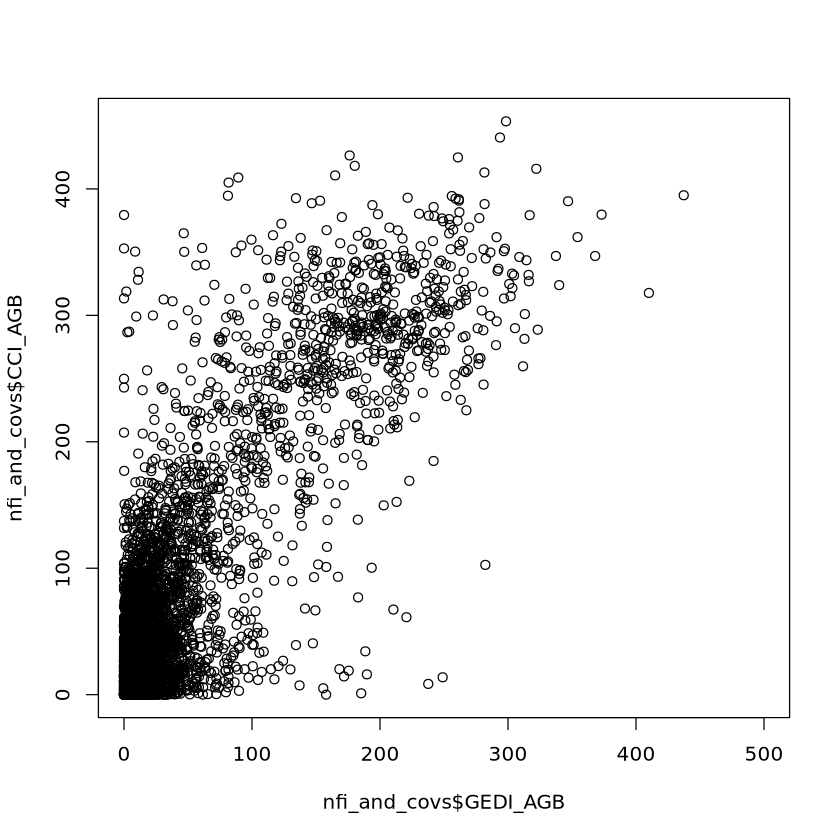

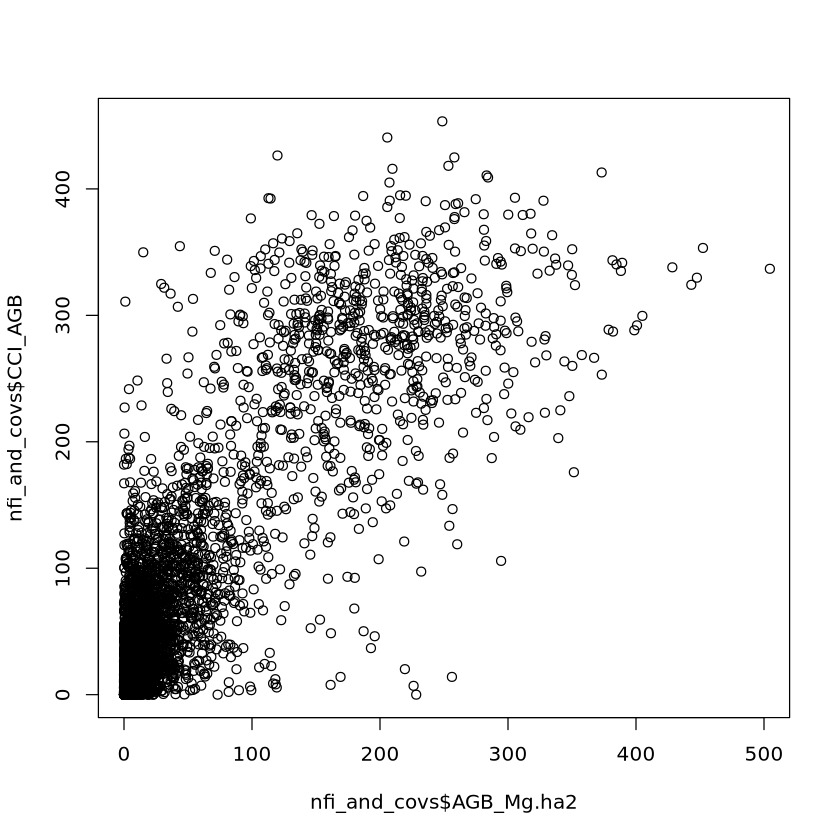


Call:
lm(formula = nfi_and_covs$AGB_Mg.ha2 ~ nfi_and_covs$GEDI_AGB * 
    nfi_and_covs$CCI_AGB)

Residuals:
    Min      1Q  Median      3Q     Max 
-263.01  -12.07   -0.75    6.14  705.04 

Coefficients:
                                             Estimate Std. Error t value
(Intercept)                                -1.846e+00  8.668e-01  -2.130
nfi_and_covs$GEDI_AGB                       2.107e-01  2.191e-02   9.617
nfi_and_covs$CCI_AGB                        4.421e-01  1.173e-02  37.687
nfi_and_covs$GEDI_AGB:nfi_and_covs$CCI_AGB  5.119e-04  8.632e-05   5.930
                                           Pr(>|t|)    
(Intercept)                                  0.0332 *  
nfi_and_covs$GEDI_AGB                       < 2e-16 ***
nfi_and_covs$CCI_AGB                        < 2e-16 ***
nfi_and_covs$GEDI_AGB:nfi_and_covs$CCI_AGB 3.23e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 40.74 on 4934 degrees of freedom
Multiple R-squared:  0.

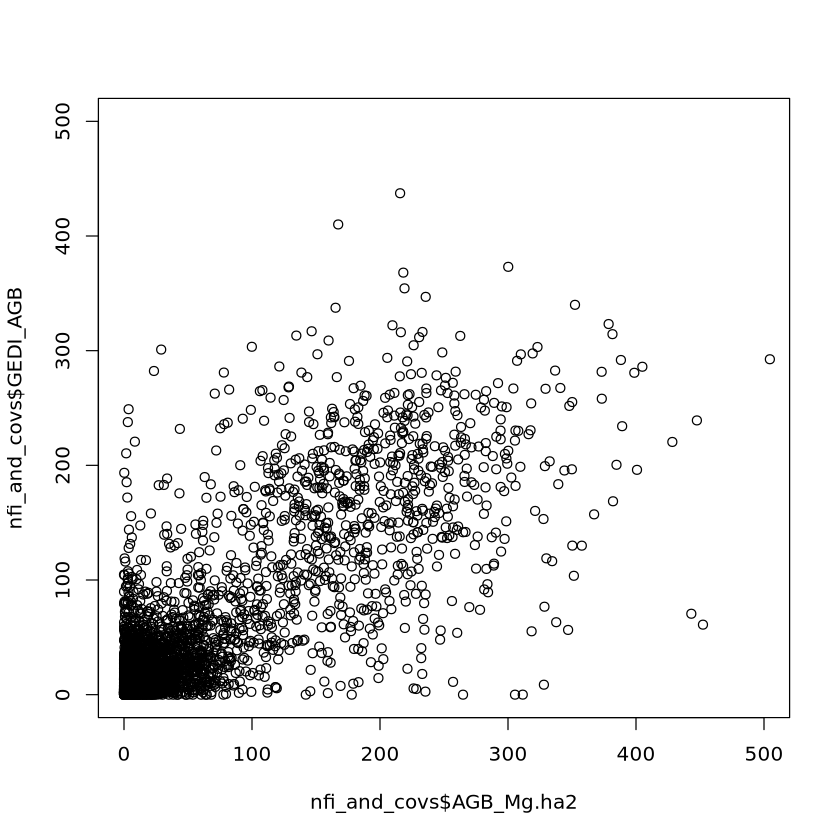

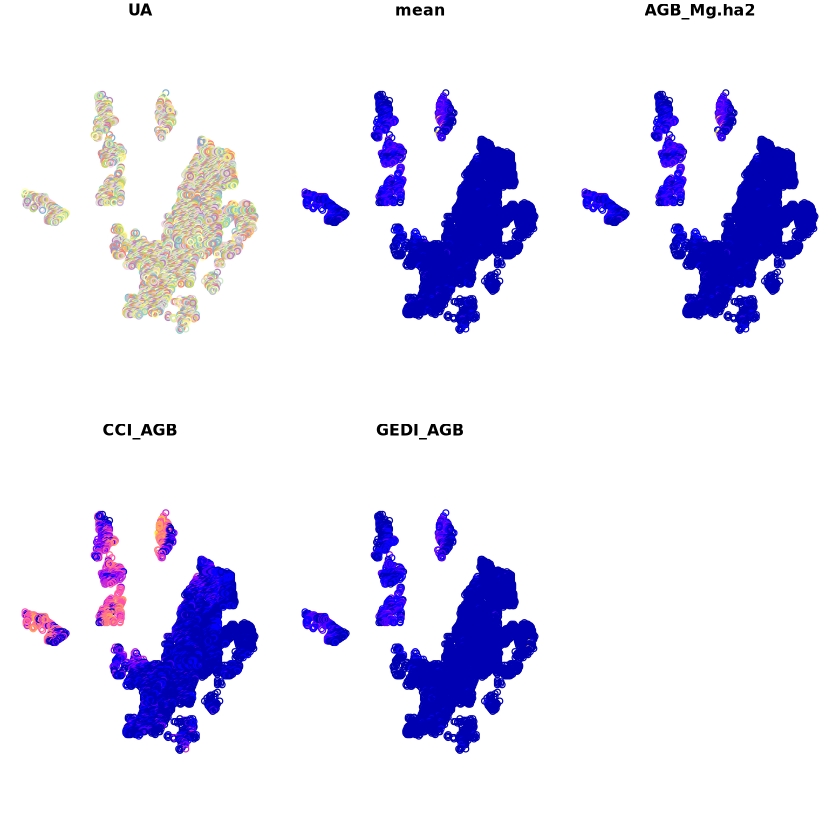

In [3]:
###############################################
###### PREPARE DATASET FOR ANALYSIS  ##########
###############################################

# GEDI data is sourced and gridded to a 0.005 degree raster. Here we reproject to 500 m pixel size raster with crs 6933. 
# GEDI <- rast("/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/Provinces_with_data/GEDI_L4A_Brazil_500m.tif") %>% project("epsg:6933")
# writeRaster(GEDI, "/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/Provinces_with_data/GEDI_Brazil_500m.tif", gdal = c("COMPRESS=LZW", "TILED=YES", "BIGTIFF=YES"),overwrite = TRUE)

nfi_and_covs <- st_read("/projects/my-private-bucket/Data/NFI_data/Brazil/Brazil_NFI_filled.gpkg") %>% st_transform(crs=6933)
nfi_and_covs <- nfi_and_covs %>% group_by(UA) %>% summarise(mean = mean(AGB_Mg.ha2))
nfi_and_covs$AGB_Mg.ha2 <- nfi_and_covs$mean

CCI <- rast("/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/Provinces_with_data/CCI_Brazil_6933.tif") # CCI tiles are mosaicked across Brazil
CCI_AGB <- exactextractr::exact_extract(CCI,st_buffer(nfi_and_covs,150), 'mean')
nfi_and_covs$CCI_AGB <- CCI_AGB

GEDI <- rast("/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/Provinces_with_data/GEDI_Brazil_500m.tif") # L4A subsetted and gridded to 500 m 
GEDI_AGB <- exactextractr::exact_extract(GEDI,st_buffer(nfi_and_covs,150), 'mean')
nfi_and_covs$GEDI_AGB <- GEDI_AGB

st_write(nfi_and_covs,"/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/Provinces_with_data/NFI_and_COVS.gpkg")
nfi_and_covs <- st_read("/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/Provinces_with_data/NFI_and_COVS.gpkg")  %>% st_transform("epsg:6933")

plot(nfi_and_covs$GEDI_AGB,nfi_and_covs$CCI_AGB,xlim=c(0,500))
plot(nfi_and_covs$AGB_Mg.ha2,nfi_and_covs$CCI_AGB,xlim=c(0,500))
plot(nfi_and_covs$AGB_Mg.ha2,nfi_and_covs$GEDI_AGB,xlim=c(0,500),ylim=c(0,500))

# Fit the linear model below to simply check the ability of the covarites to explain the independent variable. 
summary(lm(nfi_and_covs$AGB_Mg.ha2 ~ nfi_and_covs$GEDI_AGB * nfi_and_covs$CCI_AGB))
plot(nfi_and_covs)

In [4]:
###############################################
################ START ANALYSIS  ##############
###############################################

# AOI <- st_read("/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/Provinces_with_data/AOI_provinces_Amazon.gpkg") %>% st_make_valid() %>% st_union() %>% st_transform("epsg:6933")
# st_write(AOI, "/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/Provinces_with_data/AOI_provinces_Amazon_DISS.gpkg")

Brazil <- st_read("/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/Provinces_with_data/AOI_provinces_DISS.gpkg")
Brazil <- Brazil %>% st_transform(crs=6933)

CCI <- rast("/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/Provinces_with_data/CCI_Brazil_6933.tif")
GEDI <- rast("/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/Provinces_with_data/GEDI_Brazil_500m.tif") 

nfi_and_covs <- st_read("/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/Provinces_with_data/NFI_and_COVS.gpkg")  %>% st_transform("epsg:6933")
nfi_and_covs <- st_intersection(nfi_and_covs, Brazil)

nfi_and_covs$X <- (as.data.frame(st_coordinates(nfi_and_covs)))$X
nfi_and_covs$Y <- (as.data.frame(st_coordinates(nfi_and_covs)))$Y
write.csv(nfi_and_covs %>% st_drop_geometry(), "/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/Provinces_with_data/DATA.csv")

Reading layer `AOI_provinces_DISS' from data source 
  `/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/Provinces_with_data/AOI_provinces_DISS.gpkg' 
  using driver `GPKG'
Simple feature collection with 1 feature and 0 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -73.99048 ymin: -24.31781 xmax: -37.74438 ymax: 4.508911
Geodetic CRS:  Undefined geographic SRS
Reading layer `NFI_and_COVS' from data source 
  `/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/Provinces_with_data/NFI_and_COVS.gpkg' 
  using driver `GPKG'
Simple feature collection with 4938 features and 5 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -7051237 ymin: -2989196 xmax: -3647226 ymax: 527705.7
Projected CRS: WGS 84 / NSIDC EASE-Grid 2.0 Global


Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


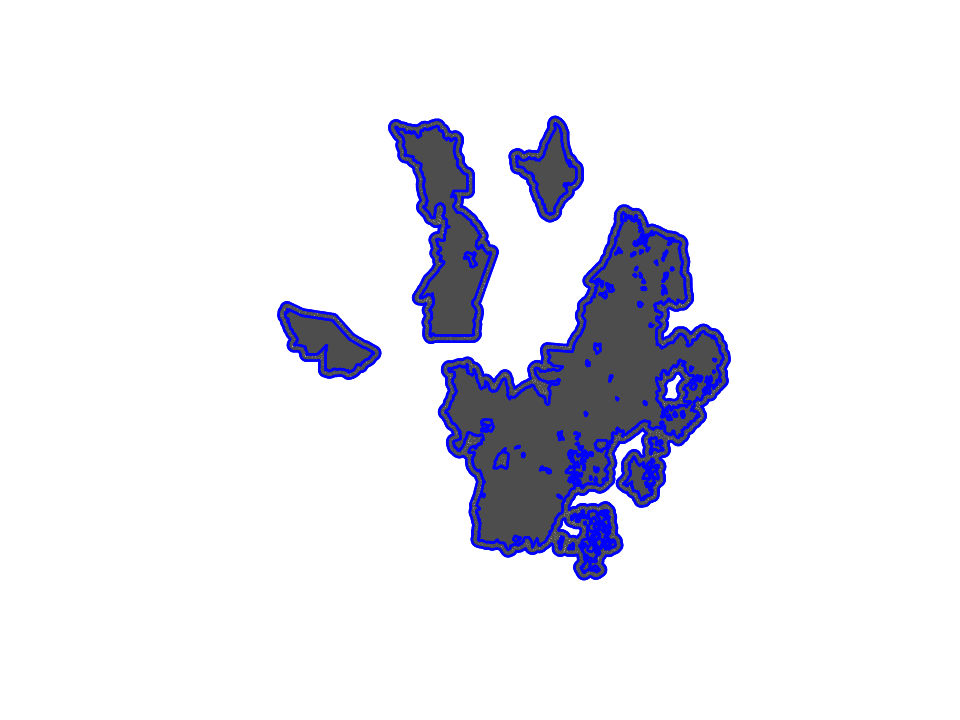

In [14]:
###################################################################
################ BEGIN MODELING - CREATE INLA MESH ################
###################################################################

options(repr.plot.width=8, repr.plot.height=6)

DATA <- read.csv("/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/Provinces_with_data/DATA.csv")
DATA <- DATA[DATA$GEDI_AGB > 0,]
DATA <- DATA[DATA$AGB_Mg.ha2 > 0,]
DATA <- DATA[DATA$CCI_AGB > 0,]
factor <- (1/3)
DATA$AGB_Mg.ha2 <- (DATA$AGB_Mg.ha2)^factor

loc.plot <- data.matrix(as.data.frame(cbind(DATA$X,DATA$Y)))
nfi.agbd <- DATA$AGB_Mg.ha2 
gedi.agbd <- DATA$GEDI_AGB
cci.agbd <- DATA$CCI_AGB

max.edge = 10*10^3
Brazil.buffer = st_buffer(Brazil, dist = max.edge*5) # We also make a 5 km buffer around Brazil to prevent boundary effects.
mesh = inla.mesh.2d(boundary = list(as(Brazil, "Spatial"), as(Brazil.buffer, "Spatial")), max.edge = c(max.edge, 3*max.edge), cutoff = 2*max.edge/3, offset = c(max.edge, 5*max.edge)) 
k = mesh$n ### This is the resulting number of vertices
loc.plot <- data.matrix(loc.plot) #In case loc.plot is a df rather than matrix, use "loc.plot <- data.matrix(loc.plot)"
plot(mesh)

n.plot = nrow(loc.plot)
A.plot = inla.spde.make.A(mesh = mesh, loc = loc.plot) # make a new projector matrix with the new mesh and the same plot locations. 

Time used:
    Pre = 1.4, Running = 602, Post = 10.3, Total = 613 
Fixed effects:
           mean    sd 0.025quant 0.5quant 0.975quant  mode kld
intercept 1.551 0.058      1.438    1.551      1.663 1.551   0
L4A       0.007 0.001      0.006    0.007      0.008 0.007   0
CCI       0.013 0.001      0.011    0.013      0.015 0.013   0

Random effects:
  Name	  Model
    alpha.spat SPDE2 model
   beta.spat SPDE2 model
   eta.spat SPDE2 model

Model hyperparameters:
                                            mean       sd 0.025quant 0.5quant
Precision for the Gaussian observations 1.88e+00 4.80e-02   1.79e+00 1.88e+00
Range for alpha.spat                    3.51e+05 7.37e+04   2.28e+05 3.43e+05
Stdev for alpha.spat                    2.54e-01 2.90e-02   2.01e-01 2.53e-01
Range for beta.spat                     9.92e+04 1.87e+04   6.72e+04 9.76e+04
Stdev for beta.spat                     5.00e-03 1.00e-03   4.00e-03 5.00e-03
Range for eta.spat                      5.66e+05 1.83e+05   3.05e+

[1] 0.9461473

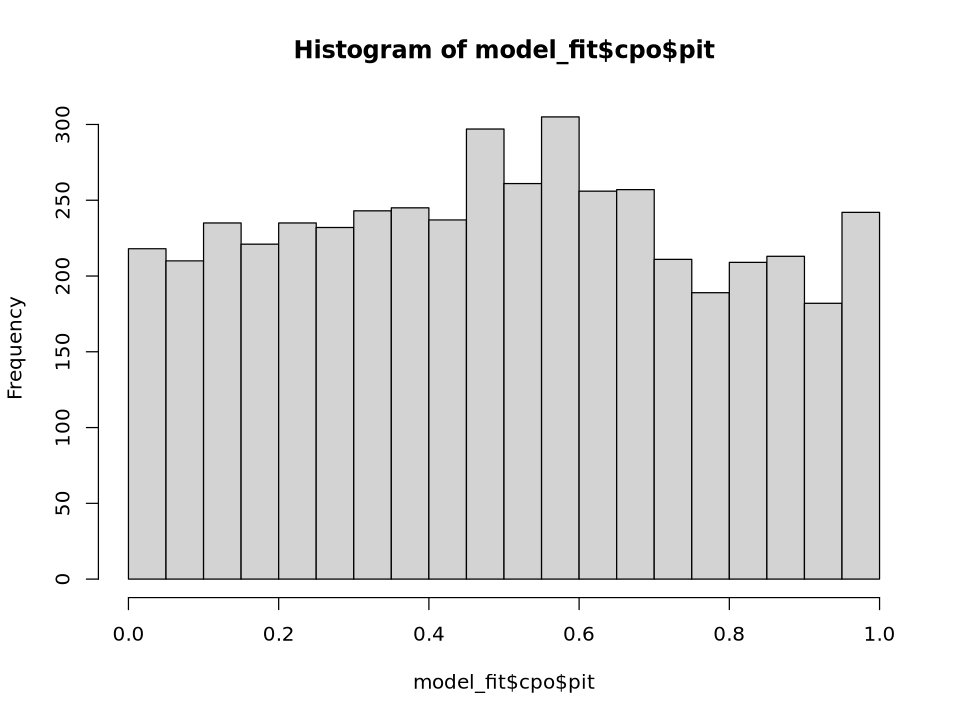

In [15]:
###############################################################
################ SET PRIORS AND RUN MODEL #####################
###############################################################

# Priors for the varying intercept alpha_tilde
spde.alpha = inla.spde2.pcmatern(mesh, 
                                 prior.range = c(30*10^3, 0.01), # This says the probability that the range is LESS than 30 km is 0.01
                                 prior.sigma = c(60, 0.01)) # This says the probability that the SD is GREATER than 60 Mg/ha is 0.01

# Priors for the varying coefficient beta_tilde
spde.beta = inla.spde2.pcmatern(mesh, 
                                prior.range = c(30*10^3, 0.01), # Same interpretations as above here
                                prior.sigma = c(1, 0.5)) # This says the probability that the SD is GREATER than 1 is 0.5


# Priors for the varying coefficient eta_tilde
spde.eta = inla.spde2.pcmatern(mesh, 
                               prior.range = c(30*10^3, 0.01), # Same interpretations as above here
                               prior.sigma = c(1, 0.5)) # This says the probability that the SD is GREATER than 1 is 0.5


### Construct our formula #####
formula = agbd ~
  -1 + # removes the automatic intercept so you can include your named intercept
  intercept + 
  L4A + 
  CCI + 
  f(alpha.spat, model = spde.alpha) + 
  f(beta.spat, model = spde.beta) + 
  f(eta.spat, model = spde.eta)

## Arrange our data so we can supply it to INLA to input in the formula above #####
stack = inla.stack(data = list(agbd = nfi.agbd),
                   A = list(1, # tell INLA we expect an intercept, and the projection matrix is just "1"
                            1, # tell INLA we expect a GEDI value, and the projection matrix for its parameter is just "1"
                            1, # tell INLA we expect a CCI value, and the projection matrix for its parameter is just "1"
                            A.plot, # tell INLA we have a mesh projected onto the plot locations for alpha-tilde 
                            Diagonal(x = gedi.agbd)%*%A.plot, # tell INLA to multiply our mesh with GEDI values for Beta-tilde
                            Diagonal(x = cci.agbd)%*%A.plot), # tell INLA to multiply our mesh with CCI values for eta-tilde
                   effects = list(
                     intercept = rep(1, n.plot), # The intercept just given an index equal to 1
                     L4A = gedi.agbd, # Supply INLA with the GEDI values
                     CCI = cci.agbd, # Supply INLA with the CCI values
                     alpha.spat = 1:k, # The random effects just need to given unique indices at each mesh node.
                     beta.spat = 1:k, #, # The random effects just need to given unique indices at each mesh node.
                     eta.spat = 1:k # The random effects just need to given unique indices at each mesh node.
                   ))

model_fit = inla(formula = formula, # Provide the formula
                 family = 'gaussian', # We assume our data follows a Gaussian generalized linear model (GLM)
                 data = inla.stack.data(stack), # These line and the one below are simply how we feed INLA the stack.
                 control.predictor = list(A = inla.stack.A(stack)),
                 control.compute = list(config = T, dic = T, waic = T, cpo = T),
                 control.inla = list(int.strategy = "eb"), # EB just fixes the hyperparameters at their maximum posterior (like maximum likelihood, but accounting for priors) values. The other methods manually integrate across the range of possible values.
                 verbose = TRUE)

summary(model_fit)
save(model_fit, file = "/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/INLA_model_fit.RData")
hist(model_fit$cpo$pit, breaks = 20) 

PITs <- model_fit$cpo$pit
length(PITs[PITs >= 0.025 & PITs <= 0.975])/length(PITs)

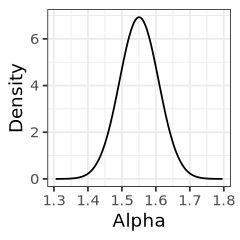

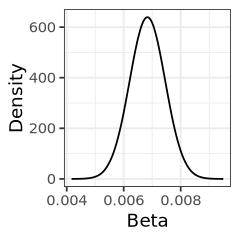

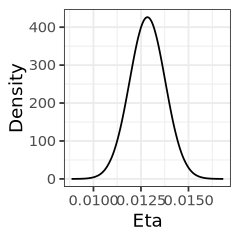

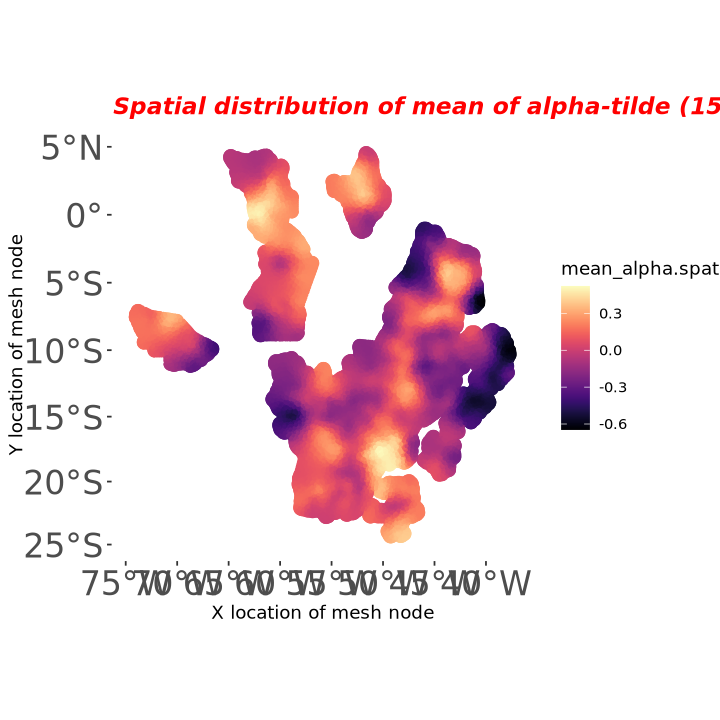

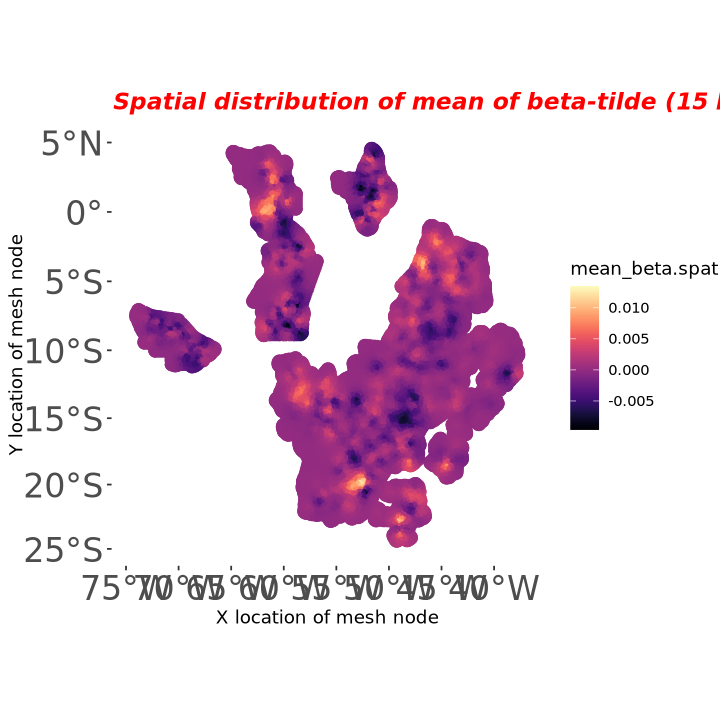

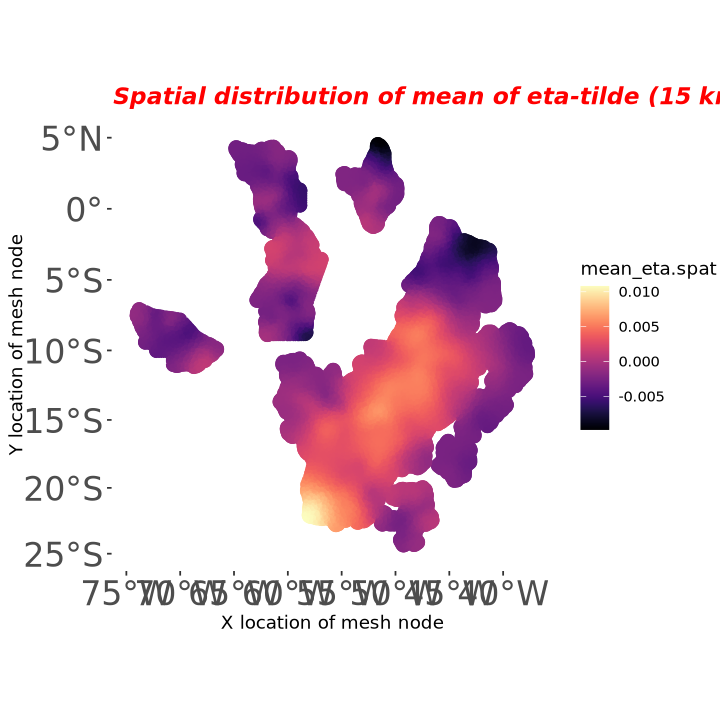

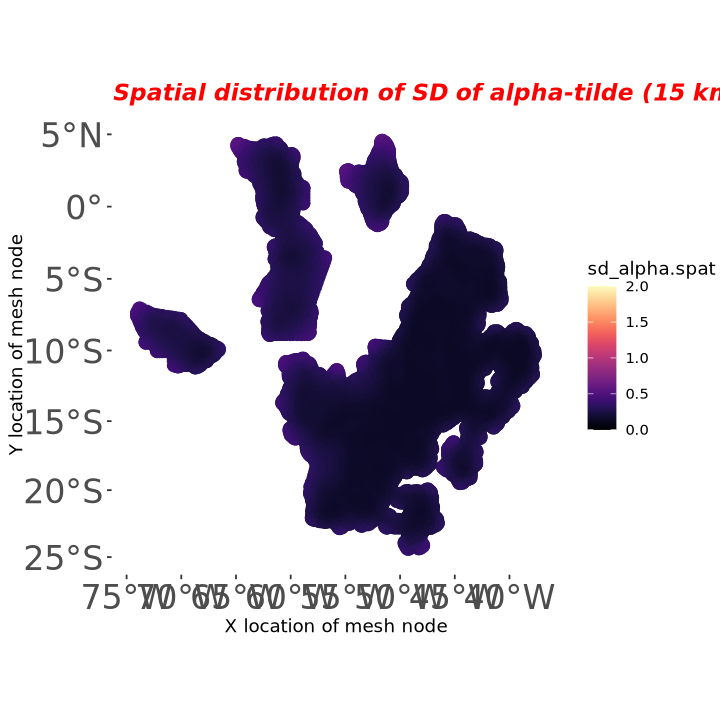

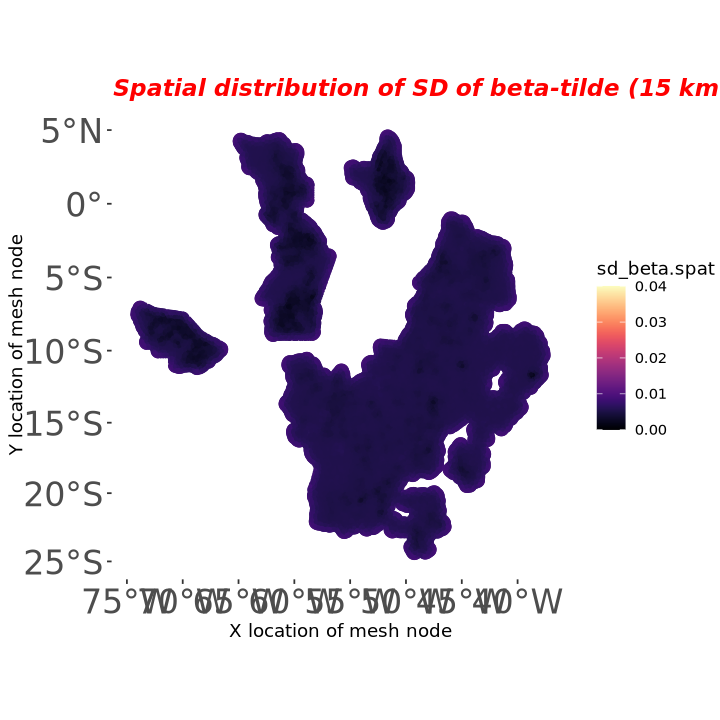

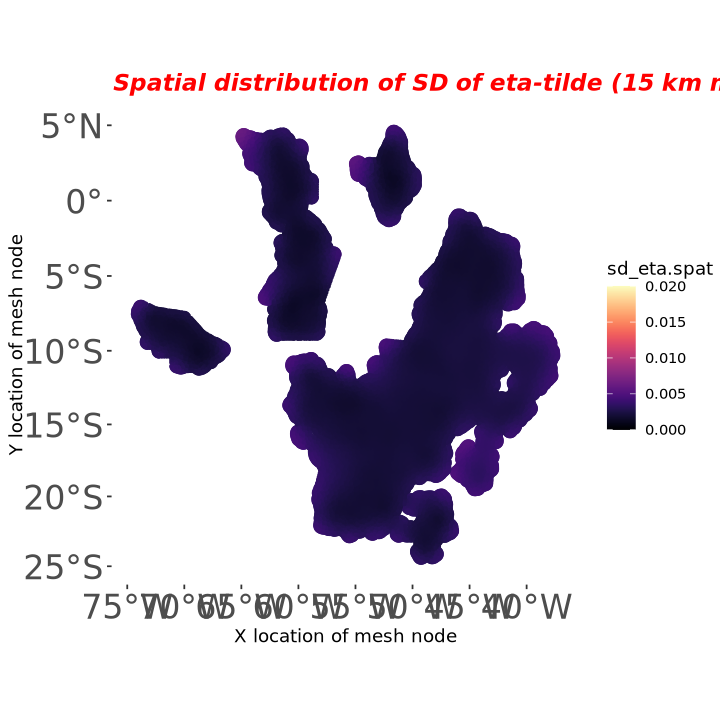

In [19]:
#############################################################################################
##################### LETS VISUALIZE THE MODEL PARAMETERS ###################################
#############################################################################################

options(repr.plot.width=2, repr.plot.height=2)
load("/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/INLA_model_fit.RData")

# When inla() is executed, we obtain an object of class "inla" that contains the information of the fitted model 
# including summaries and posterior marginal densities of the fixed effects, 
# the random effects, and the hyperparameters (and many more things, but we explore only these for now). 

# The fixed effects are straighforward to understand. Below, we see the posterior elements of the intercept alpha, and parameters beta and eta. 
alpha <- model_fit$marginals.fixed[[1]]
beta <- model_fit$marginals.fixed[[2]]
eta <- model_fit$marginals.fixed[[3]]
ggplot(data.frame(inla.smarginal(alpha)), aes(x, y)) + geom_line() + theme_bw() + xlab("Alpha") + ylab("Density")
ggplot(data.frame(inla.smarginal(beta)), aes(x, y)) + geom_line() + theme_bw() + xlab("Beta") + ylab("Density")
ggplot(data.frame(inla.smarginal(eta)), aes(x, y)) + geom_line() + theme_bw() + xlab("Eta") + ylab("Density")

# The random effects, in our case, are also easy to understand from the model outputs. The posterior distributions of the range and SD of alpha.spat, 
# beta.spat and eta.spat show us how these random effects vary across Mexico.

options(repr.plot.width=6, repr.plot.height=6)

mean_alpha.spat <- model_fit$summary.random[[1]]$mean # mean values of alpha.spat at each mesh vertex
sd_alpha.spat <- model_fit$summary.random[[1]]$sd # standard deviation of alpha.spat at each mesh node 

mean_beta.spat <- model_fit$summary.random[[2]]$mean # mean values of alpha.spat at each mesh vertex
sd_beta.spat <- model_fit$summary.random[[2]]$sd # standard deviation of alpha.spat at each mesh node 

mean_eta.spat <- model_fit$summary.random[[3]]$mean # mean values of alpha.spat at each mesh vertex
sd_eta.spat <- model_fit$summary.random[[3]]$sd # standard deviation of alpha.spat at each mesh node 

ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = mesh$loc[,1], y = mesh$loc[,2], col = mean_alpha.spat),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(option="magma") + xlab("X location of mesh node") + ylab("Y location of mesh node") + ggtitle("Spatial distribution of mean of alpha-tilde (15 km mesh)") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(),axis.text=element_text(size=20),axis.title=element_text())
ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = mesh$loc[,1], y = mesh$loc[,2], col = mean_beta.spat),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(option="magma") + xlab("X location of mesh node") + ylab("Y location of mesh node") + ggtitle("Spatial distribution of mean of beta-tilde (15 km mesh)") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(),axis.text=element_text(size=20),axis.title=element_text())
ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = mesh$loc[,1], y = mesh$loc[,2], col = mean_eta.spat),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
          scale_color_viridis(option="magma") + xlab("X location of mesh node") + ylab("Y location of mesh node") + ggtitle("Spatial distribution of mean of eta-tilde (15 km mesh)") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(),axis.text=element_text(size=20),axis.title=element_text())
ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = mesh$loc[,1], y = mesh$loc[,2], col = sd_alpha.spat),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(option="magma",limits=c(0,2)) + xlab("X location of mesh node") + ylab("Y location of mesh node") + ggtitle("Spatial distribution of SD of alpha-tilde (15 km mesh)") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(),axis.text=element_text(size=20),axis.title=element_text())
ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = mesh$loc[,1], y = mesh$loc[,2], col = sd_beta.spat),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(option="magma",limits=c(0,0.04)) + xlab("X location of mesh node") + ylab("Y location of mesh node") + ggtitle("Spatial distribution of SD of beta-tilde (15 km mesh)") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(),axis.text=element_text(size=20),axis.title=element_text())
ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = mesh$loc[,1], y = mesh$loc[,2], col = sd_eta.spat),size=0.5) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(option="magma",limits=c(0,0.02)) + xlab("X location of mesh node") + ylab("Y location of mesh node") + ggtitle("Spatial distribution of SD of eta-tilde (15 km mesh)") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(),axis.text=element_text(size=20),axis.title=element_text())
options(repr.plot.width=4, repr.plot.height=4)

# DIC, WAIC and the CPO and PIT are standard Bayesian model diagnostics, which tell us how our model is performing. 

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


[1] 0.8557642

[1] 29.56369

[1] 0.1921574

[1] 0.9612601

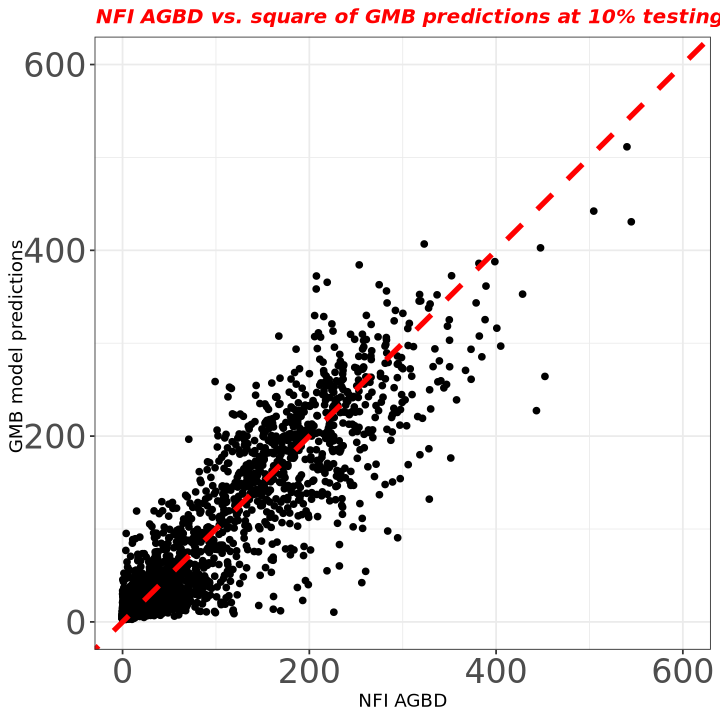

In [20]:
###############################################################
######## SCATTER PLOT OF PREDICTIONS VS. NFI-ESTIMATES ########
###############################################################

samples = inla.posterior.sample(n = 250, result = model_fit) # Draw posterior samples from our model fit 

# Our model function
pred_fun = function(...){
  drop(intercept + 
         gedi.agbd*L4A +
         cci.agbd*CCI +
         A.plot%*%alpha.spat[1:k] +   
         Diagonal(x = gedi.agbd)%*%A.plot%*%beta.spat[1:k] + 
         Diagonal(x = cci.agbd)%*%A.plot%*%eta.spat[1:k]) +
    rnorm(nrow(A.plot), sd = sqrt(1/theta[1])) 
}

# Generate prediction samples, i.e. ask INLA to use the prediction function and samples to make predictions. 
pred.samples = (inla.posterior.sample.eval(fun = pred_fun,samples = samples)) #

# Model mean AGBD expectations and SD's at the grid locations
pred.mu = Matrix::rowMeans(pred.samples^(1/factor),na.rm=TRUE)
pred.sd = apply(pred.samples^(1/factor), 1, sd)
options(repr.plot.width=5, repr.plot.height=5)

OUTPUT <- do.call(rbind, Map(data.frame, PRED=pred.mu, NFI=nfi.agbd^(1/factor), PRED.SD=pred.sd, RES=nfi.agbd^(1/factor)-pred.mu))
options(repr.plot.width=6, repr.plot.height=6)
ggplot(data = OUTPUT, aes(x = NFI,y = PRED))+ geom_point()  + geom_abline(size=0.5,linetype=2,col="red",lwd=1.5) + theme_bw() + xlim(0,600) + ylim(0,600) + xlab("NFI AGBD") + ylab("GMB model predictions ") + ggtitle("NFI AGBD vs. square of GMB predictions at 10% testing locations") + theme(plot.title = element_text(color="red", size=12, face="bold.italic"),axis.text=element_text(size=20))

####################################################################
######################## HEURISTICS: R2 AND RMSE ###################
####################################################################

R2_backtrans = 1 - (sum((pred.mu - nfi.agbd^(1/factor))^2,na.rm=TRUE)/sum((nfi.agbd^(1/factor) - mean(nfi.agbd^(1/factor),na.rm=TRUE))^2,na.rm=TRUE))
R2_backtrans
RMSE = sqrt(mean((pred.mu - nfi.agbd^(1/factor))^2,na.rm=TRUE))
RMSE
BIAS = mean(pred.mu,na.rm=TRUE) - mean(nfi.agbd^(1/factor),na.rm=TRUE)
BIAS # Mg/ha

###########################################################################
############## RATE OF OVERLAP OF CREDIBILITY INTERVALS ###################
###########################################################################

Q25 <- apply(pred.samples^(1/factor), 1, quantile, probs = c(0.025), na.rm=TRUE)
Q975 <- apply(pred.samples^(1/factor), 1, quantile, probs = c(0.975), na.rm=TRUE)
sum((nfi.agbd^(1/factor) >= Q25) & (nfi.agbd^(1/factor) <= Q975), na.rm=TRUE)/length(nfi.agbd^(1/factor))

Multiple layers are present in data source /projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/Provinces_with_data/AOI_provinces.gpkg, reading layer `provinces_with_data__bra_admbnda_adm2_ibge_2020'.
Use `st_layers' to list all layer names and their type in a data source.
Set the `layer' argument in `st_read' to read a particular layer.


Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
“automatically selected the first layer in a data source containing more than one.”


Reading layer `provinces_with_data__bra_admbnda_adm2_ibge_2020' from data source `/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/Provinces_with_data/AOI_provinces.gpkg' 
  using driver `GPKG'
Simple feature collection with 1117 features and 8 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -73.99048 ymin: -24.31781 xmax: -37.74438 ymax: 4.508911
Geodetic CRS:  Undefined geographic SRS
[1] "Processing Province:  Xapuri"
Multiple layers are present in data source /projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/Provinces_with_data/AOI_provinces.gpkg, reading layer `provinces_with_data__bra_admbnda_adm2_ibge_2020'.
Use `st_layers' to list all layer names and their type in a data source.
Set the `layer' argument in `st_read' to read a particular layer.


Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
“automatically selected the first layer in a data source containing more than one.”


Reading layer `provinces_with_data__bra_admbnda_adm2_ibge_2020' from data source `/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/Provinces_with_data/AOI_provinces.gpkg' 
  using driver `GPKG'
Simple feature collection with 1117 features and 8 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -73.99048 ymin: -24.31781 xmax: -37.74438 ymax: 4.508911
Geodetic CRS:  Undefined geographic SRS


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:4326)”
Cannot preload entire working area of 41511432 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1359590901 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
[1] "Mean predicted AGBD: 67.49"
[1] "Predicted SD of AGBD: 2.68"
[1] "------------------------------------------------------"


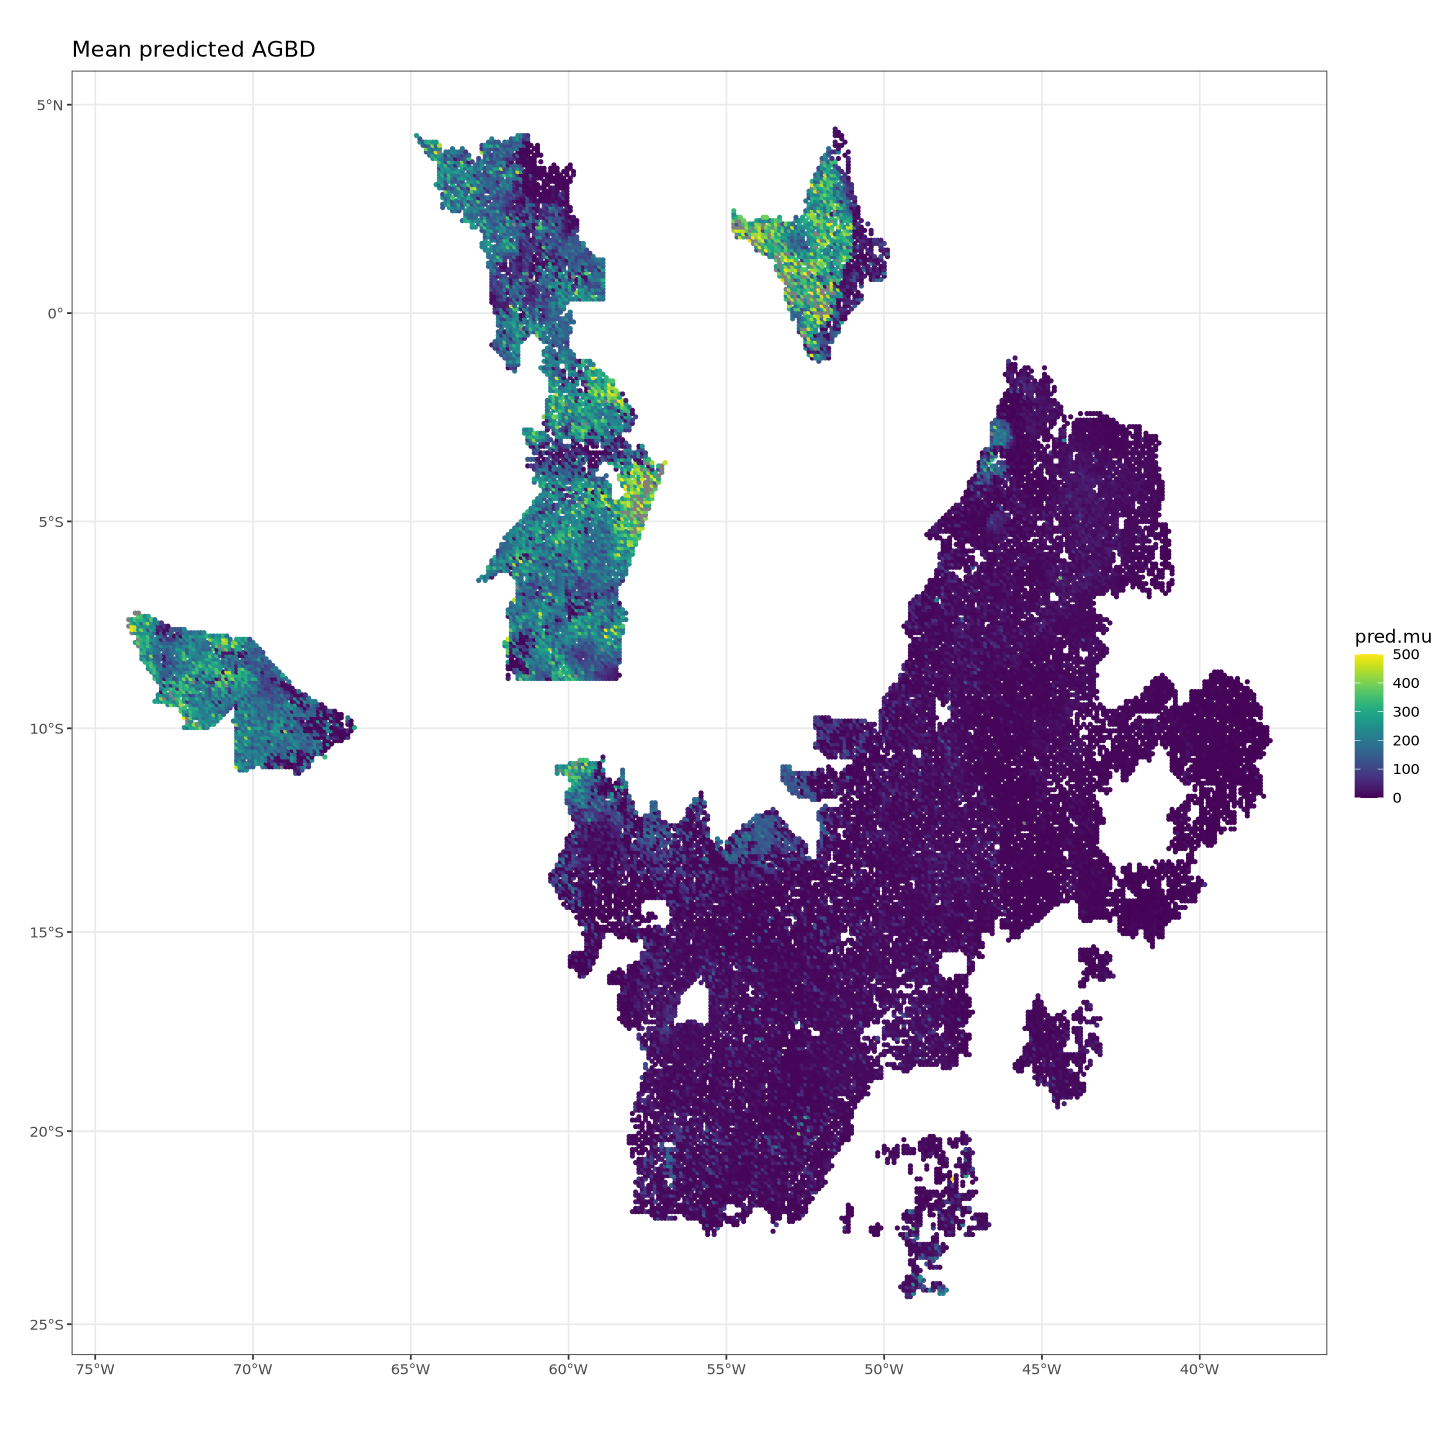

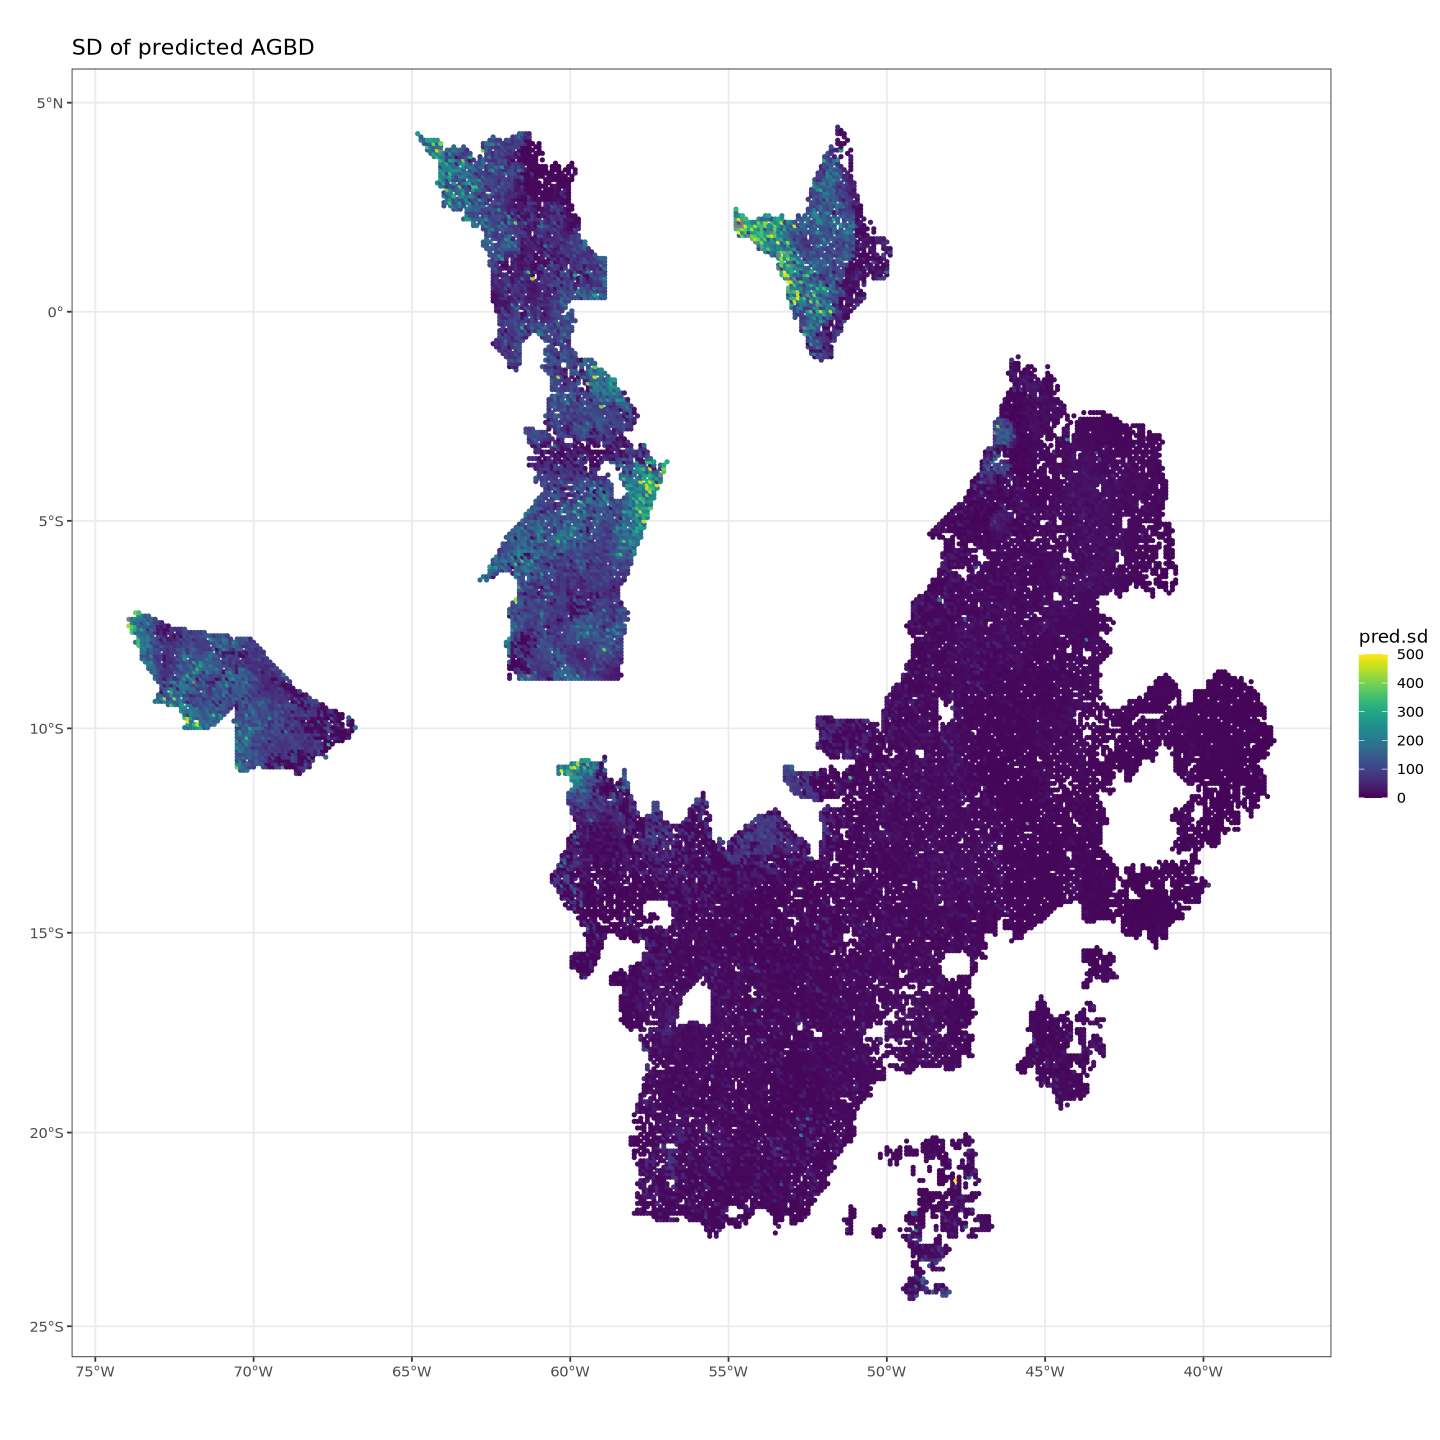

In [21]:
# ###############################################################################
# ################ MAKING FIGURE FOR PREDICTIONS IN ONE PROVINCE ################
# ###############################################################################

Provinces <- st_read("/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/Provinces_with_data/AOI_provinces.gpkg") %>% st_transform(crs=6933)
Provinces["AGBD"] <- 0
Provinces["AGBD_SE"] <- 0

load("/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/INLA_model_fit.RData")
CCI <- rast("/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/Provinces_with_data/CCI_Brazil_6933.tif")
GEDI <- rast("/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/Provinces_with_data/GEDI_L4A_Brazil_500m.tif") 

Province_name <- 'Xapuri'
Province <- Provinces[Provinces$ADM2_PT == Province_name,]
print(paste("Processing Province: ", Province_name))

Province <- st_read("/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/Provinces_with_data/AOI_provinces.gpkg") %>% st_transform(crs=6933)
Provinces["AGBD"] <- 0
Provinces["AGBD_SE"] <- 0

grid_to_predict = st_make_grid(Province, cellsize = c(10000,10000), what = "centers") %>% st_as_sf() %>% st_filter(Province)
grid = as.data.frame(grid_to_predict %>% st_coordinates())

GEDI.pred = exactextractr::exact_extract(GEDI,st_buffer(grid_to_predict,100), 'mean')
grid$GEDI.pred <- GEDI.pred

CCI.pred = exactextractr::exact_extract(CCI,st_buffer(grid_to_predict,100), 'mean')
CCI.array <- CCI.pred
grid$CCI.array = CCI.array

grid_original <- grid
grid <- grid[(!is.na(grid$CCI.array) & grid$GEDI.pred>0),]
grid_to_predict <- grid_to_predict[(!is.na(grid_original$CCI.array) & grid_original$GEDI.pred>0),]
loc.plot_T <- data.matrix(as.data.frame(cbind(grid$X,grid$Y)))

CCI.pred <- CCI.pred[(!is.na(CCI.array) & GEDI.pred>0)]
GEDI.pred <- GEDI.pred[(!is.na(CCI.array) & GEDI.pred>0)]

samples = inla.posterior.sample(n = 250, result = model_fit) # Draw posterior samples from our model fit 
A.pred = inla.spde.make.A(mesh = mesh, loc = loc.plot_T) # Make a new projector matrix with the same mesh, but new plot locations 

# Our model function
pred_fun = function(...){
  drop(intercept + 
    GEDI.pred*L4A +
    CCI.pred*CCI +
    A.pred%*%alpha.spat[1:k] +   
    Diagonal(x = GEDI.pred)%*%A.pred%*%beta.spat[1:k] + 
    Diagonal(x = CCI.pred)%*%A.pred%*%eta.spat[1:k]) +
    rnorm(nrow(A.pred), sd = sqrt(1/theta[1])) 
}

# Generate prediction samples, i.e. ask INLA to use the prediction function and samples to make predictions at our testing plot locations. 
pred.samples = (inla.posterior.sample.eval(fun = pred_fun,samples = samples)) #
pred.samples[pred.samples < 0] = 0

# Model mean AGBD expectations and SD's at the grid locations
pred.mu = Matrix::rowMeans(pred.samples^(1/factor),na.rm=TRUE)
pred.sd = apply(pred.samples^(1/factor), 1, sd)

# Model mean AGBD expectations and SD of the strata
Strata_mean <- round(mean(pred.mu,na.rm=TRUE),digits=2)
Strata_SD <- round(sd(colMeans(pred.samples^(1/factor), na.rm = T),na.rm=TRUE),digits=2)

print(paste0("Mean predicted AGBD: ", Strata_mean))
print(paste0("Predicted SD of AGBD: ", Strata_SD))
print("------------------------------------------------------")
Provinces[Provinces$ADM2_PT == Province_name,]$AGBD <- Strata_mean
Provinces[Provinces$ADM2_PT == Province_name,]$AGBD_SE <- Strata_SD

options(repr.plot.width=12, repr.plot.height=12)
ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = loc.plot_T[,1], y = loc.plot_T[,2], col = pred.mu),size=0.8) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(limits = c(0, 500)) + xlab("") + ylab("") + ggtitle("Mean predicted AGBD") + theme(plot.title = element_text(color="red", size=20, face="bold.italic"),axis.text.x = element_text(size = 20)) +
           theme_bw() #+ geom_sf(data = Province,col="red",fill=NA,lwd=0.1)# add our fake deforestation sites


ggplot() + coord_sf(crs = 6933) + 
           geom_point(aes(x = loc.plot_T[,1], y = loc.plot_T[,2], col = pred.sd),size=0.8) +  # make a map to see plot locations and the AGBD values at each location
           scale_color_viridis(limits = c(0, 500)) + xlab("") + ylab("") + ggtitle("SD of predicted AGBD") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"),axis.text = element_text(size = 20)) + 
           theme_bw() #+ geom_sf(data = Province,col="red",fill=NA,lwd=0.1)# add our fake deforestation sites


In [22]:
###############################################################################
################ MAKING FPREDICTIONS IN SELECTED AMAZON 6-ISLANDS #############
###############################################################################

Provinces <- st_read("/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/Provinces_with_data/Grid_nfi6933_sel_DISS.gpkg") %>% st_transform(crs=6933)
Provinces["AGBD"] <- 0
Provinces["AGBD_SE"] <- 0

load("/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/INLA_model_fit.RData")
CCI <- rast("/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/Provinces_with_data/CCI_Brazil_6933.tif")
GEDI <- rast("/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/Provinces_with_data/GEDI_L4A_Brazil_500m.tif") 

for (REGION in Provinces$REGION) {
    Province_name <- REGION
    Province <- Provinces[Provinces$REGION == Province_name,]
    print(paste("Processing REGION: ", Province_name))

    grid_to_predict = st_make_grid(Province, cellsize = c(1000,1000), what = "centers") %>% st_as_sf() %>% st_filter(Province)
    grid = as.data.frame(grid_to_predict %>% st_coordinates())
    
    GEDI.pred = exactextractr::exact_extract(GEDI,st_buffer(grid_to_predict,100), 'mean')
    grid$GEDI.pred <- GEDI.pred
    
    CCI.pred = exactextractr::exact_extract(CCI,st_buffer(grid_to_predict,100), 'mean')
    CCI.array <- CCI.pred
    grid$CCI.array = CCI.array
    
    grid_original <- grid
    grid <- grid[(!is.na(grid$CCI.array) & grid$GEDI.pred>0),]
    grid_to_predict <- grid_to_predict[(!is.na(grid_original$CCI.array) & grid_original$GEDI.pred>0),]
    loc.plot_T <- data.matrix(as.data.frame(cbind(grid$X,grid$Y)))
    
    CCI.pred <- CCI.pred[(!is.na(CCI.array) & GEDI.pred>0)]
    GEDI.pred <- GEDI.pred[(!is.na(CCI.array) & GEDI.pred>0)]
    
    samples = inla.posterior.sample(n = 250, result = model_fit) # Draw posterior samples from our model fit 
    A.pred = inla.spde.make.A(mesh = mesh, loc = loc.plot_T) # Make a new projector matrix with the same mesh, but new plot locations 
    
    # Our model function
    pred_fun = function(...){
      drop(intercept + 
        GEDI.pred*L4A +
        CCI.pred*CCI +
        A.pred%*%alpha.spat[1:k] +   
        Diagonal(x = GEDI.pred)%*%A.pred%*%beta.spat[1:k] + 
        Diagonal(x = CCI.pred)%*%A.pred%*%eta.spat[1:k]) +
        rnorm(nrow(A.pred), sd = sqrt(1/theta[1])) 
    }
    
    # Generate prediction samples, i.e. ask INLA to use the prediction function and samples to make predictions at our testing plot locations. 
    pred.samples = (inla.posterior.sample.eval(fun = pred_fun,samples = samples)) #
    pred.samples[pred.samples < 0] = 0
    
    # Model mean AGBD expectations and SD's at the grid locations
    pred.mu = Matrix::rowMeans(pred.samples^(1/factor),na.rm=TRUE)
    pred.sd = apply(pred.samples^(1/factor), 1, sd)
    
    # Model mean AGBD expectations and SD of the strata
    Strata_mean <- round(mean(pred.mu,na.rm=TRUE),digits=2)
    Strata_SD <- round(sd(colMeans(pred.samples^(1/factor), na.rm = T),na.rm=TRUE),digits=2)
    
    print(paste0("Mean predicted AGBD: ", Strata_mean))
    print(paste0("Predicted SD of AGBD: ", Strata_SD))
    print("------------------------------------------------------")
    Provinces[Provinces$REGION == Province_name,]$AGBD <- Strata_mean
    Provinces[Provinces$REGION == Province_name,]$AGBD_SE <- Strata_SD
    
    options(repr.plot.width=12, repr.plot.height=12)
    ggplot() + coord_sf(crs = 6933) + 
               geom_point(aes(x = loc.plot_T[,1], y = loc.plot_T[,2], col = pred.mu),size=0.8) +  # make a map to see plot locations and the AGBD values at each location
               scale_color_viridis(limits = c(0, 500)) + xlab("") + ylab("") + ggtitle("Mean predicted AGBD") + theme(plot.title = element_text(color="red", size=20, face="bold.italic"),axis.text.x = element_text(size = 20)) +
               theme_bw() #+ geom_sf(data = Province,col="red",fill=NA,lwd=0.1)# add our fake deforestation sites
    
    
    ggplot() + coord_sf(crs = 6933) + 
               geom_point(aes(x = loc.plot_T[,1], y = loc.plot_T[,2], col = pred.sd),size=0.8) +  # make a map to see plot locations and the AGBD values at each location
               scale_color_viridis(limits = c(0, 500)) + xlab("") + ylab("") + ggtitle("SD of predicted AGBD") + theme(plot.title = element_text(color="red", size=14, face="bold.italic"),axis.text = element_text(size = 20)) + 
               theme_bw() #+ geom_sf(data = Province,col="red",fill=NA,lwd=0.1)# add our fake deforestation sites
}

Reading layer `dissolved' from data source 
  `/projects/my-public-bucket/Data/NASA_CMS_2023/BRAZIL/Provinces_with_data/Grid_nfi6933_sel_DISS.gpkg' 
  using driver `GPKG'
Simple feature collection with 6 features and 10 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -7061237 ymin: -1402386 xmax: -4227730 ymax: 514808
Projected CRS: WGS 84 / NSIDC EASE-Grid 2.0 Global
[1] "Processing REGION:  1"


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:4326)”


  |======================================================================| 100%


Cannot preload entire working area of 32321016 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
[1] "Mean predicted AGBD: 148.15"
[1] "Predicted SD of AGBD: 5.32"
[1] "------------------------------------------------------"
[1] "Processing REGION:  3"


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:4326)”


  |======================================================================| 100%
  |======================================================================| 100%
[1] "Mean predicted AGBD: 194.5"
[1] "Predicted SD of AGBD: 6.7"
[1] "------------------------------------------------------"
[1] "Processing REGION:  2"


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:4326)”


  |======================================================================| 100%
  |======================================================================| 100%
[1] "Mean predicted AGBD: 175.68"
[1] "Predicted SD of AGBD: 6.23"
[1] "------------------------------------------------------"
[1] "Processing REGION:  5"


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:4326)”


  |======================================================================| 100%
  |======================================================================| 100%
[1] "Mean predicted AGBD: 207.66"
[1] "Predicted SD of AGBD: 6.93"
[1] "------------------------------------------------------"
[1] "Processing REGION:  6"


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:4326)”


  |======================================================================| 100%


Cannot preload entire working area of 60430887 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
[1] "Mean predicted AGBD: 25.67"
[1] "Predicted SD of AGBD: 4.84"
[1] "------------------------------------------------------"
[1] "Processing REGION:  4"


Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:4326)”


  |======================================================================| 100%
  |======================================================================| 100%
[1] "Mean predicted AGBD: 116.27"
[1] "Predicted SD of AGBD: 4.38"
[1] "------------------------------------------------------"
